In [ ]:
import pandas as pd

# Load the CSV files
comments_df = pd.read_csv("/content/comments.csv")
posts_df = pd.read_csv("/content/posts.csv")
votes_df = pd.read_csv("/content/votes.csv")
history_df = pd.read_csv("/content/post_history.csv")
users_df = pd.read_csv("/content/users.csv")

# Merge the dataframes
merged_df = pd.merge(comments_df, posts_df, on="id", how="outer")

merged_df = pd.merge(merged_df, votes_df, on="id", how="outer")
merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
merged_df = pd.merge(merged_df, users_df, on="id", how="outer")

# Display the results
print(f"Merged dataframe shape: {merged_df.shape}")

<ipython-input-1-64454e40982b>:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'creation_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, history_df, on="id", how="outer")


Merged dataframe shape: (3199665, 40)


In [ ]:
print(merged_df.columns)

Index(['Unnamed: 0_x', 'id', 'post_id_x', 'text', 'creation_date_x',
       'user_id_x', 'Unnamed: 0_y', 'post_type_id', 'accepted_answer_id',
       'parent_id', 'creation_date_y', 'score', 'view_count', 'owner_user_id',
       'tags', 'answer_count', 'comment_count', 'favorite_count',
       'closed_date', 'community_owned_date', 'title', 'body', 'Unnamed: 0_x',
       'post_id_y', 'vote_type_id', 'creation_date_x', 'bounty_amount',
       'Unnamed: 0_y', 'ph_type_id', 'post_id', 'creation_date_y', 'user_id_y',
       'Unnamed: 0', 'reputation', 'creation_date', 'display_name', 'views',
       'upvotes', 'downvotes', 'account_id'],
      dtype='object')


In [ ]:

# Convert the "creation_date" column to datetime format
merged_df["creation_date"] = pd.to_datetime(merged_df["creation_date"])

# Count the number of answered and unanswered questions over the years
answered = merged_df[merged_df["answer_count"] > 0].groupby(merged_df["creation_date"].dt.year)["id"].count()
unanswered = merged_df[merged_df["answer_count"] == 0].groupby(merged_df["creation_date"].dt.year)["id"].count()

# Calculate the percentage of answered and unanswered questions
total = answered + unanswered
answered_percent = (answered / total) * 100
unanswered_percent = (unanswered / total) * 100

# Display the results
print("Percentage of answered questions over the years:")
print(answered_percent)
print("\nPercentage of unanswered questions over the years:")
print(unanswered_percent)


Percentage of answered questions over the years:
creation_date
2010.0    28.476821
2011.0    32.065415
2012.0    34.015571
2013.0    33.890421
2014.0    34.383192
2015.0    34.678468
2016.0    34.817186
2017.0    34.907407
2018.0    35.045920
2019.0    34.850486
2020.0    34.170091
2021.0    33.769108
2022.0    33.440748
Name: id, dtype: float64

Percentage of unanswered questions over the years:
creation_date
2010.0    71.523179
2011.0    67.934585
2012.0    65.984429
2013.0    66.109579
2014.0    65.616808
2015.0    65.321532
2016.0    65.182814
2017.0    65.092593
2018.0    64.954080
2019.0    65.149514
2020.0    65.829909
2021.0    66.230892
2022.0    66.559252
Name: id, dtype: float64


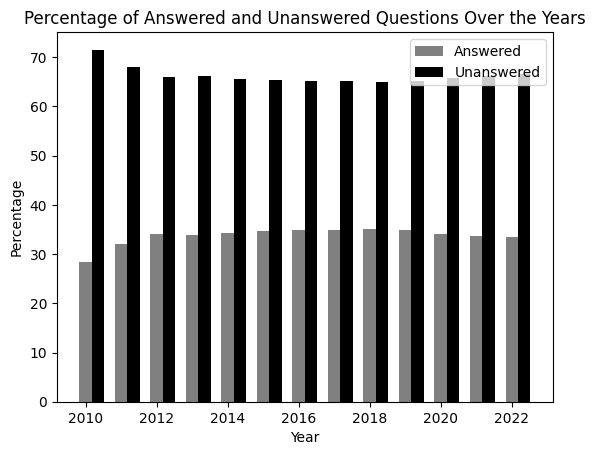

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the percentage of answered and unanswered questions over the years
years = np.array(answered_percent.index)
width = 0.35
fig, ax = plt.subplots()
ax.bar(years, answered_percent, width, label="Answered", color="gray")
ax.bar(years + width, unanswered_percent, width, label="Unanswered", color="black")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Answered and Unanswered Questions Over the Years")
ax.legend()
plt.show()

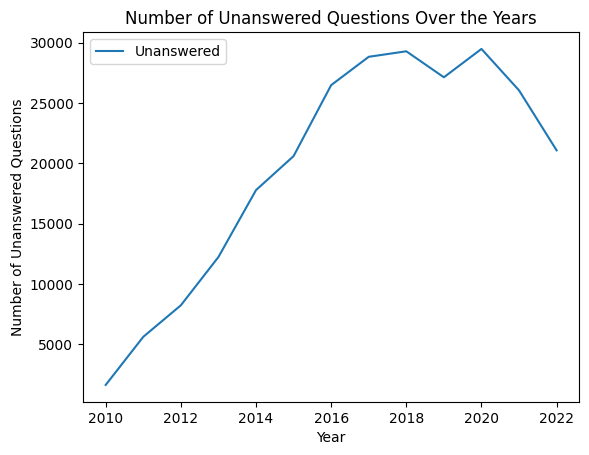

In [ ]:
import matplotlib.pyplot as plt

# Convert the "creation_date" column to datetime format
merged_df["creation_date"] = pd.to_datetime(merged_df["creation_date"])

# Filter for only unanswered questions and group by year
unanswered = merged_df[merged_df["answer_count"] == 0].groupby(merged_df["creation_date"].dt.year)["id"].count()

# Plot the number of unanswered questions over the years as a line graph
fig, ax = plt.subplots()
ax.plot(unanswered.index, unanswered, label="Unanswered")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Unanswered Questions")
ax.set_title("Number of Unanswered Questions Over the Years")
ax.legend()
plt.show()


<ipython-input-9-e943ccd8afda>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'creation_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, history_df, on="id", how="outer")


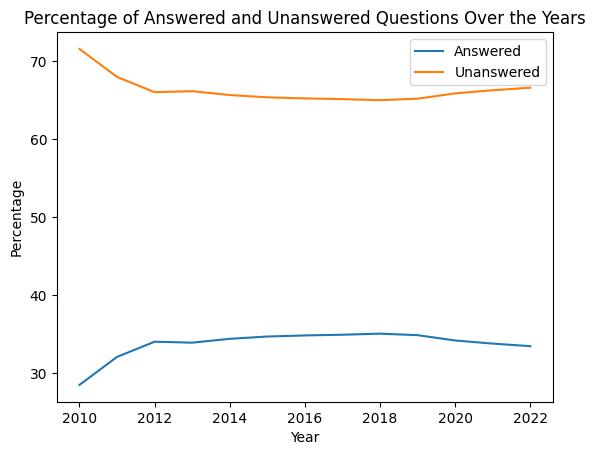

Numerical features classification report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49    111292
           1       0.93      0.94      0.93    848608

    accuracy                           0.88    959900
   macro avg       0.71      0.71      0.71    959900
weighted avg       0.88      0.88      0.88    959900

Numerical features confusion matrix:
 [[ 53398  57894]
 [ 54971 793637]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

#Load the CSV files
comments_df = pd.read_csv("/content/comments.csv")
posts_df = pd.read_csv("/content/posts.csv")
votes_df = pd.read_csv("/content/votes.csv")
history_df = pd.read_csv("/content/post_history.csv")
users_df = pd.read_csv("/content/users.csv")

#Merge the dataframes
merged_df = pd.merge(comments_df, posts_df, on="id", how="outer")
merged_df = pd.merge(merged_df, votes_df, on="id", how="outer")
merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
merged_df = pd.merge(merged_df, users_df, on="id", how="outer")

#Convert the "creation_date" column to datetime format
merged_df["creation_date"] = pd.to_datetime(merged_df["creation_date"])

#Count the number of answered and unanswered questions over the years
answered = merged_df[merged_df["answer_count"] > 0].groupby(merged_df["creation_date"].dt.year)["id"].count()
unanswered = merged_df[merged_df["answer_count"] == 0].groupby(merged_df["creation_date"].dt.year)["id"].count()

#Calculate the percentage of answered and unanswered questions
total = answered + unanswered
answered_percent = (answered / total) * 100
unanswered_percent = (unanswered / total) * 100

#Plot the percentage of answered and unanswered questions over the years
fig, ax = plt.subplots()
ax.plot(answered_percent.index, answered_percent, label="Answered")
ax.plot(unanswered_percent.index, unanswered_percent, label="Unanswered")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Answered and Unanswered Questions Over the Years")
ax.legend()
plt.show()

#Extract numerical features
merged_df["char_count"] = merged_df["text"].apply(lambda x: len(str(x)))
merged_df["word_count"] = merged_df["text"].apply(lambda x: len(str(x).split()))
merged_df["avg_word_length"] = merged_df["text"].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()))
merged_df["answer_count_missing"] = merged_df["answer_count"].apply(lambda x: 1 if pd.isna(x) else 0)
merged_df["num_tags"] = merged_df["tags"].apply(lambda x: len(str(x).split("<")))
X = merged_df[["char_count", "word_count", "avg_word_length", "answer_count_missing", "num_tags"]].values
y = merged_df["answer_count"].apply(lambda x: 0 if x == 0 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Numerical features classification report:\n", classification_report(y_test, y_pred))
print("Numerical features confusion matrix:\n", confusion_matrix(y_test, y_pred))

<ipython-input-10-7872f16d6ee9>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'creation_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
<ipython-input-10-7872f16d6ee9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["creation_date"] = pd.to_datetime(filtered_df["creation_date"])


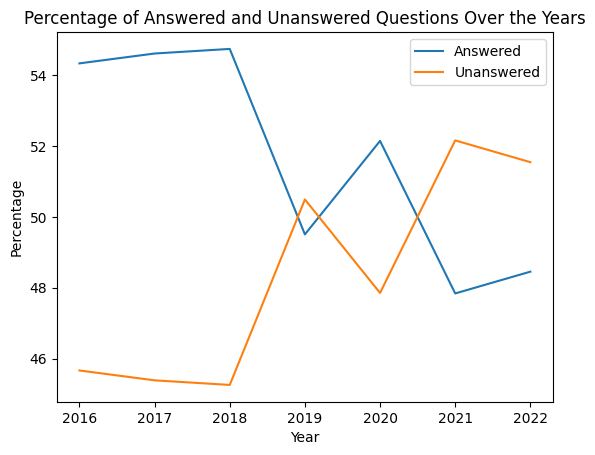

<ipython-input-10-7872f16d6ee9>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["char_count"] = filtered_df["text"].apply(lambda x: len(str(x)))
<ipython-input-10-7872f16d6ee9>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["word_count"] = filtered_df["text"].apply(lambda x: len(str(x).split()))
<ipython-input-10-7872f16d6ee9>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

Numerical features classification report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64     27564
           1       0.67      0.79      0.73     29867

    accuracy                           0.69     57431
   macro avg       0.70      0.69      0.68     57431
weighted avg       0.69      0.69      0.69     57431

Numerical features confusion matrix:
 [[15971 11593]
 [ 6197 23670]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

#Load the CSV files
comments_df = pd.read_csv("/content/comments.csv")
posts_df = pd.read_csv("/content/posts.csv")
votes_df = pd.read_csv("/content/votes.csv")
history_df = pd.read_csv("/content/post_history.csv")
users_df = pd.read_csv("/content/users.csv")

#Merge the dataframes
merged_df = pd.merge(comments_df, posts_df, on="id", how="outer")
merged_df = pd.merge(merged_df, votes_df, on="id", how="outer")
merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
merged_df = pd.merge(merged_df, users_df, on="id", how="outer")

#Filter out data created more than 5 years ago and unanswered questions
filtered_df = merged_df[(merged_df["creation_date"] >= "2016-01-01") & (merged_df["answer_count"] != 0)]

#Set answer_count, favorite_count, and comment_count as 0 for unanswered questions
filtered_df.loc[filtered_df["answer_count"].isna(), "answer_count"] = 0
filtered_df.loc[filtered_df["favorite_count"].isna(), "favorite_count"] = 0
filtered_df.loc[filtered_df["comment_count"].isna(), "comment_count"] = 0

#Convert the "creation_date" column to datetime format
filtered_df["creation_date"] = pd.to_datetime(filtered_df["creation_date"])

#Count the number of answered and unanswered questions over the years
answered = filtered_df[filtered_df["answer_count"] > 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()
unanswered = filtered_df[filtered_df["answer_count"] == 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()

#Calculate the percentage of answered and unanswered questions
total = answered + unanswered
answered_percent = (answered / total) * 100
unanswered_percent = (unanswered / total) * 100

#Plot the percentage of answered and unanswered questions over the years
fig, ax = plt.subplots()
ax.plot(answered_percent.index, answered_percent, label="Answered")
ax.plot(unanswered_percent.index, unanswered_percent, label="Unanswered")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Answered and Unanswered Questions Over the Years")
ax.legend()
plt.show()

#Extract numerical features
filtered_df["char_count"] = filtered_df["text"].apply(lambda x: len(str(x)))
filtered_df["word_count"] = filtered_df["text"].apply(lambda x: len(str(x).split()))
filtered_df["avg_word_length"] = filtered_df["text"].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()))
filtered_df["answer_count_missing"] = filtered_df["answer_count"].apply(lambda x: 1 if pd.isna(x) else 0)
filtered_df["num_tags"] = filtered_df["tags"].apply(lambda x: len(str(x).split("<")))
X = filtered_df[["char_count", "word_count", "avg_word_length", "answer_count_missing", "num_tags"]].values
y = filtered_df["answer_count"].apply(lambda x: 0 if x == 0 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train and test the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Print the classification report and confusion matrix
print("Numerical features classification report:\n", classification_report(y_test, y_pred))
print("Numerical features confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

#Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#Print accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 1.0


<ipython-input-18-7d3cf8d99f68>:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'creation_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
<ipython-input-18-7d3cf8d99f68>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["creation_date"] = pd.to_datetime(filtered_df["creation_date"])


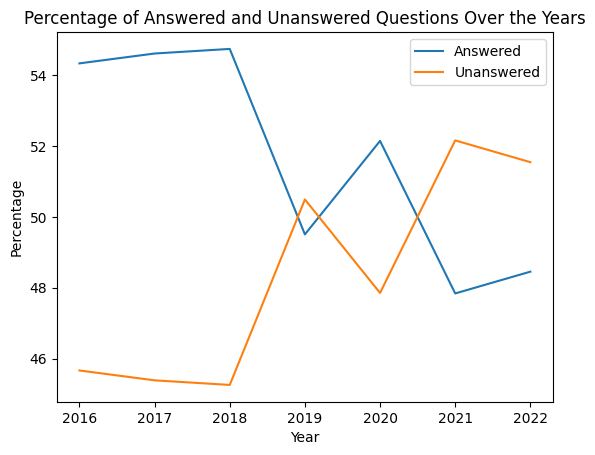

Cross-validation results: [0.69076473 0.69122679 0.68501058 0.68777914 0.69404759]
Average cross-validation accuracy: 0.6897657650652678


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings

#Load the CSV files
comments_df = pd.read_csv("/content/comments.csv")
posts_df = pd.read_csv("/content/posts.csv")
votes_df = pd.read_csv("/content/votes.csv")
history_df = pd.read_csv("/content/post_history.csv")
users_df = pd.read_csv("/content/users.csv")

#Merge the dataframes
merged_df = pd.merge(comments_df, posts_df, on="id", how="outer")
merged_df = pd.merge(merged_df, votes_df, on="id", how="outer")
merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
merged_df = pd.merge(merged_df, users_df, on="id", how="outer")

#Filter out data created more than 5 years ago and unanswered questions
filtered_df = merged_df[(merged_df["creation_date"] >= "2016-01-01") & (merged_df["answer_count"] != 0)]

#Set answer_count, favorite_count, and comment_count as 0 for unanswered questions
filtered_df.loc[filtered_df["answer_count"].isna(), "answer_count"] = 0
filtered_df.loc[filtered_df["favorite_count"].isna(), "favorite_count"] = 0
filtered_df.loc[filtered_df["comment_count"].isna(), "comment_count"] = 0

#Convert the "creation_date" column to datetime format
filtered_df["creation_date"] = pd.to_datetime(filtered_df["creation_date"])

#Count the number of answered and unanswered questions over the years
answered = filtered_df[filtered_df["answer_count"] > 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()
unanswered = filtered_df[filtered_df["answer_count"] == 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()

#Calculate the percentage of answered and unanswered questions
total = answered + unanswered
answered_percent = (answered / total) * 100
unanswered_percent = (unanswered / total) * 100

#Plot the percentage of answered and unanswered questions over the years
fig, ax = plt.subplots()
ax.plot(answered_percent.index, answered_percent, label="Answered")
ax.plot(unanswered_percent.index, unanswered_percent, label="Unanswered")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Answered and Unanswered Questions Over the Years")
ax.legend()
plt.show()

import warnings
from pandas.core.common import SettingWithCopyWarning

# Ignore SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

#Extract numerical features
filtered_df.loc[:, "char_count"] = filtered_df["text"].apply(lambda x: len(str(x)))
filtered_df.loc[:, "word_count"] = filtered_df["text"].apply(lambda x: len(str(x).split()))
filtered_df.loc[:, "avg_word_length"] = filtered_df["text"].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()))
filtered_df.loc[:, "answer_count_missing"] = filtered_df["answer_count"].apply(lambda x: 1 if pd.isna(x) else 0)
filtered_df.loc[:, "num_tags"] = filtered_df["tags"].apply(lambda x: len(str(x).split("<")))
X = filtered_df[["char_count", "word_count", "avg_word_length", "answer_count_missing", "num_tags"]].values
y = filtered_df["answer_count"].apply(lambda x: 0 if x == 0 else 1)

#Import necessary packages for cross-validation
from sklearn.model_selection import KFold, cross_val_score

#Define the model to use
classifier = MultinomialNB()

#Define the number of folds for cross-validation
n_folds = 5

#Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#Run cross-validation and print the average accuracy score
cv_results = cross_val_score(classifier, X, y, cv=kf)
print("Cross-validation results:", cv_results)
print("Average cross-validation accuracy:", cv_results.mean())

<ipython-input-19-50cf8d8d8546>:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'creation_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, history_df, on="id", how="outer")


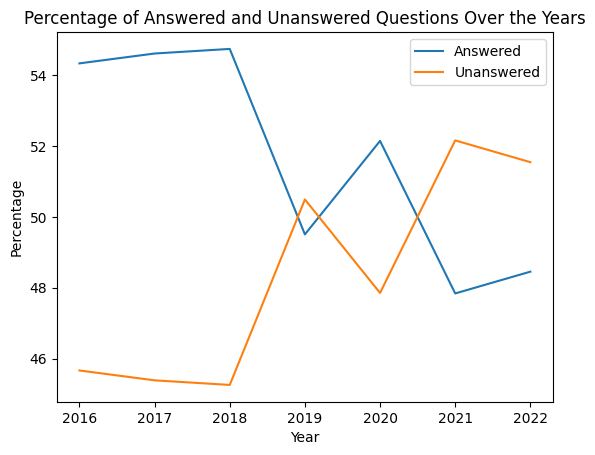

Cross-validation results: [1. 1. 1. 1. 1.]
Average cross-validation accuracy: 1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

#Load the CSV files
comments_df = pd.read_csv("/content/comments.csv")
posts_df = pd.read_csv("/content/posts.csv")
votes_df = pd.read_csv("/content/votes.csv")
history_df = pd.read_csv("/content/post_history.csv")
users_df = pd.read_csv("/content/users.csv")

#Merge the dataframes
merged_df = pd.merge(comments_df, posts_df, on="id", how="outer")
merged_df = pd.merge(merged_df, votes_df, on="id", how="outer")
merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
merged_df = pd.merge(merged_df, users_df, on="id", how="outer")

#Filter out data created more than 5 years ago and unanswered questions
filtered_df = merged_df[(merged_df["creation_date"] >= "2016-01-01") & (merged_df["answer_count"] != 0)]

#Set answer_count, favorite_count, and comment_count as 0 for unanswered questions
filtered_df.loc[filtered_df["answer_count"].isna(), "answer_count"] = 0
filtered_df.loc[filtered_df["favorite_count"].isna(), "favorite_count"] = 0
filtered_df.loc[filtered_df["comment_count"].isna(), "comment_count"] = 0

#Convert the "creation_date" column to datetime format
filtered_df["creation_date"] = pd.to_datetime(filtered_df["creation_date"])

#Count the number of answered and unanswered questions over the years
answered = filtered_df[filtered_df["answer_count"] > 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()
unanswered = filtered_df[filtered_df["answer_count"] == 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()

#Calculate the percentage of answered and unanswered questions
total = answered + unanswered
answered_percent = (answered / total) * 100
unanswered_percent = (unanswered / total) * 100

#Plot the percentage of answered and unanswered questions over the years
fig, ax = plt.subplots()
ax.plot(answered_percent.index, answered_percent, label="Answered")
ax.plot(unanswered_percent.index, unanswered_percent, label="Unanswered")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Answered and Unanswered Questions Over the Years")
ax.legend()
plt.show()

import warnings
from pandas.core.common import SettingWithCopyWarning

#Ignore SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

#Extract numerical features
filtered_df.loc[:, "char_count"] = filtered_df["text"].apply(lambda x: len(str(x)))
filtered_df.loc[:, "word_count"] = filtered_df["text"].apply(lambda x: len(str(x).split()))
filtered_df.loc[:, "avg_word_length"] = filtered_df["text"].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()))
filtered_df.loc[:, "answer_count_missing"] = filtered_df["answer_count"].apply(lambda x: 1 if pd.isna(x) else 0)
filtered_df.loc[:, "num_tags"] = filtered_df["tags"].apply(lambda x: len(str(x).split("<")))
X = filtered_df[["char_count", "word_count", "avg_word_length", "answer_count_missing", "num_tags"]].values
y = filtered_df["answer_count"].apply(lambda x: 0 if x == 0 else 1)

#Import necessary packages for cross-validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Define the model to use
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Define the number of folds for cross-validation
n_folds = 5

#Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#Run cross-validation and print the average accuracy score
cv_results = cross_val_score(classifier, X, y, cv=kf)
print("Cross-validation results:", cv_results)
print("Average cross-validation accuracy:", cv_results.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the Random Forest model
classifier = RandomForestClassifier()

# Define the grid search method
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=kf, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)


KeyboardInterrupt: ignored

In [ ]:
#Import necessary packages for splitting the data and fitting the model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the decision tree classifier with limited depth and pruning
dt = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.001)

#Define the number of folds for cross-validation
n_folds = 5

#Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#Run cross-validation and print the average accuracy score
cv_results = cross_val_score(dt, X_train, y_train, cv=kf)
print("Cross-validation results:", cv_results)
print("Average cross-validation accuracy:", cv_results.mean())

#Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

#Predict the target variable for the testing set
y_pred = dt.predict(X_test)

#Print the classification report and confusion matrix
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation results: [1. 1. 1. 1. 1.]
Average cross-validation accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18399
           1       1.00      1.00      1.00     19889

    accuracy                           1.00     38288
   macro avg       1.00      1.00      1.00     38288
weighted avg       1.00      1.00      1.00     38288

Confusion matrix:
 [[18399     0]
 [    0 19889]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the Random Forest classifier with default parameters
rf = RandomForestClassifier()

#Define the number of folds for cross-validation
n_folds = 5

#Define the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#Run cross-validation and print the average accuracy score
cv_results = cross_val_score(rf, X_train, y_train, cv=kf)
print("Cross-validation results:", cv_results)
print("Average cross-validation accuracy:", cv_results.mean())

#Fit the Random Forest classifier to the training data
rf.fit(X_train, y_train)

#Predict the target variable for the testing set
y_pred = rf.predict(X_test)

#Print the classification report and confusion matrix
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Cross-validation results: [1. 1. 1. 1. 1.]
Average cross-validation accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18399
           1       1.00      1.00      1.00     19889

    accuracy                           1.00     38288
   macro avg       1.00      1.00      1.00     38288
weighted avg       1.00      1.00      1.00     38288

Confusion matrix:
 [[18399     0]
 [    0 19889]]


<ipython-input-34-aa965594baca>:21: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'creation_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, history_df, on="id", how="outer")


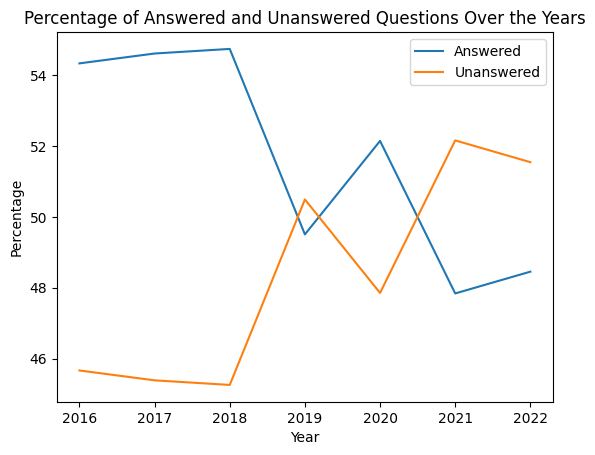

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import warnings

#Load the CSV files
comments_df = pd.read_csv("/content/comments.csv")
posts_df = pd.read_csv("/content/posts.csv")
votes_df = pd.read_csv("/content/votes.csv")
history_df = pd.read_csv("/content/post_history.csv")
users_df = pd.read_csv("/content/users.csv")

#Merge the dataframes
merged_df = pd.merge(comments_df, posts_df, on="id", how="outer")
merged_df = pd.merge(merged_df, votes_df, on="id", how="outer")
merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
merged_df = pd.merge(merged_df, users_df, on="id", how="outer")

#Filter out data created more than 5 years ago and unanswered questions
filtered_df = merged_df[(merged_df["creation_date"] >= "2016-01-01") & (merged_df["answer_count"] != 0)]

#Set answer_count, favorite_count, and comment_count as 0 for unanswered questions
filtered_df.loc[filtered_df["answer_count"].isna(), "answer_count"] = 0
filtered_df.loc[filtered_df["favorite_count"].isna(), "favorite_count"] = 0
filtered_df.loc[filtered_df["comment_count"].isna(), "comment_count"] = 0

#Convert the "creation_date" column to datetime format
filtered_df["creation_date"] = pd.to_datetime(filtered_df["creation_date"])

#Count the number of answered and unanswered questions over the years
answered = filtered_df[filtered_df["answer_count"] > 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()
unanswered = filtered_df[filtered_df["answer_count"] == 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()

#Calculate the percentage of answered and unanswered questions
total = answered + unanswered
answered_percent = (answered / total) * 100
unanswered_percent = (unanswered / total) * 100

#Plot the percentage of answered and unanswered questions over the years
fig, ax = plt.subplots()
ax.plot(answered_percent.index, answered_percent, label="Answered")
ax.plot(unanswered_percent.index, unanswered_percent, label="Unanswered")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Answered and Unanswered Questions Over the Years")
ax.legend()
plt.show()

import nltk
nltk.download('stopwords')

# Tokenize and preprocess text
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
texts = [tokenizer.tokenize(str(text).lower()) for text in filtered_df['title']]

# Create dictionary and corpus
import gensim
dictionary = gensim.corpora.Dictionary(texts)
corpus_bow = [dictionary.doc2bow(text) for text in texts]

from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the documents to ensure they have the same length
max_document_length = max(len(doc) for doc in corpus_bow)
corpus_processed = [" ".join(str(word) for word in doc) + "0" * (max_document_length - len(doc)) for doc in corpus]

# Convert the documents into a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_processed)

# Fit the LDA model
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

corpus_words = [[word for word, count in doc] for doc in corpus_bow]
corpus_processed = [" ".join(str(word) for word in doc) for doc in corpus_words]


# Convert the documents into a bag-of-words representation
corpus_bow = [dictionary.doc2bow(doc) for doc in corpus_words]

# Get the topic distribution for each document
document_topics = lda_model.get_document_topics(corpus_bow)
document_topics = np.array([[topic_prob[1] for topic_prob in doc_probs] for doc_probs in document_topics])

# Add topic distribution to the feature matrix
X = np.hstack((X, document_topics))

# Add topic distribution to the feature matrix
X = filtered_df[['char_count', 'word_count', 'avg_word_length', 'answer_count_missing', 'num_tags']].copy()
for i in range(num_topics):
    X[f'topic_{i}'] = document_topics[:, i]

# Set target variable
y = filtered_df['answer_count'].apply(lambda x: 0 if x == 0 else 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate LDA model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results = cross_val_score(classifier, X_train, y_train, cv=5)
print('Cross-validation results:', cv_results)
print('Average cross-validation accuracy:', cv_results.mean())

# Fit final model on entire training set and evaluate on test set
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

<ipython-input-35-14dbe5eac205>:21: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'creation_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, history_df, on="id", how="outer")


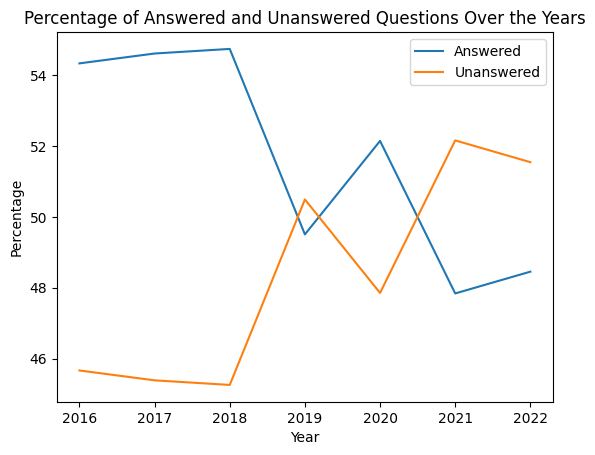

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from pandas.core.common import SettingWithCopyWarning

#Load the CSV files
comments_df = pd.read_csv("/content/comments.csv")
posts_df = pd.read_csv("/content/posts.csv")
votes_df = pd.read_csv("/content/votes.csv")
history_df = pd.read_csv("/content/post_history.csv")
users_df = pd.read_csv("/content/users.csv")

#Merge the dataframes
merged_df = pd.merge(comments_df, posts_df, on="id", how="outer")
merged_df = pd.merge(merged_df, votes_df, on="id", how="outer")
merged_df = pd.merge(merged_df, history_df, on="id", how="outer")
merged_df = pd.merge(merged_df, users_df, on="id", how="outer")

#Filter out data created more than 5 years ago and unanswered questions
filtered_df = merged_df[(merged_df["creation_date"] >= "2016-01-01") & (merged_df["answer_count"] != 0)]

#Set answer_count, favorite_count, and comment_count as 0 for unanswered questions
filtered_df.loc[filtered_df["answer_count"].isna(), "answer_count"] = 0
filtered_df.loc[filtered_df["favorite_count"].isna(), "favorite_count"] = 0
filtered_df.loc[filtered_df["comment_count"].isna(), "comment_count"] = 0

#Convert the "creation_date" column to datetime format
filtered_df["creation_date"] = pd.to_datetime(filtered_df["creation_date"])

#Count the number of answered and unanswered questions over the years
answered = filtered_df[filtered_df["answer_count"] > 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()
unanswered = filtered_df[filtered_df["answer_count"] == 0].groupby(filtered_df["creation_date"].dt.year)["id"].count()

#Calculate the percentage of answered and unanswered questions
total = answered + unanswered
answered_percent = (answered / total) * 100
unanswered_percent = (unanswered / total) * 100

#Plot the percentage of answered and unanswered questions over the years
fig, ax = plt.subplots()
ax.plot(answered_percent.index, answered_percent, label="Answered")
ax.plot(unanswered_percent.index, unanswered_percent, label="Unanswered")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Answered and Unanswered Questions Over the Years")
ax.legend()
plt.show()

#Extract numerical features
filtered_df.loc[:, "char_count"] = filtered_df["text"].apply(lambda x: len(str(x)))
filtered_df.loc[:, "word_count"] = filtered_df["text"].apply(lambda x: len(str(x).split()))
filtered_df.loc[:, "avg_word_length"] = filtered_df["text"].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()))
filtered_df.loc[:, "answer_count_missing"] = filtered_df["answer_count"].apply(lambda x: 1 if pd.isna(x) else 0)
filtered_df.loc[:, "num_tags"] = filtered_df["tags"].apply(lambda x: len(str(x).split("<")))
X = filtered_df[["char_count", "word_count", "avg_word_length", "answer_count_missing", "num_tags"]].values
y = filtered_df["answer_count"].apply(lambda x: 0 if x == 0 else 1)

#Define the parameter grid for grid search
param_grid = {
'learning_rate': [0.01, 0.1, 1, 10],
'n_estimators': [50, 100, 200, 300],
'max_depth': list(range(1, 6)),
'subsample': [0.5, 0.75, 1],
'min_samples_leaf': [1, 2, 4]
}

#Define the k-fold cross-validation object
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Define the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

#Define the grid search object
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=kf, n_jobs=-1, scoring='accuracy')

#Fit the model using grid search
grid_search.fit(X_train, y_train)

#Print the best hyperparameters, the corresponding accuracy, precision, and F1-score
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy score:", grid_search.best_score_)
print("Precision, Recall and F1-score:\n", classification_report(y_test, y_pred))